In [4]:
!pip install pmdarima

In [5]:
import pandas as pd
from pmdarima.arima import auto_arima
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [6]:
def load_data(ETF):

    data_close = pd.read_csv(ETF)
    data_close.index = pd.to_datetime(data_close['Date'], format = '%d-%m-%Y')
    data_close = data_close.drop(['Date'], axis = 1)
    
    return data_close

AirPassengers = "wipro.csv"

df = load_data(AirPassengers)
df = pd.DataFrame(df['Close'], columns = ['Close'])
df

,Close
Date,
2000-01-03,2724.20
2000-01-04,2942.15
2000-01-05,2990.10
2000-01-06,2932.25
2000-01-07,2697.70
...,...
2021-04-26,480.30
2021-04-27,485.05
2021-04-28,489.30


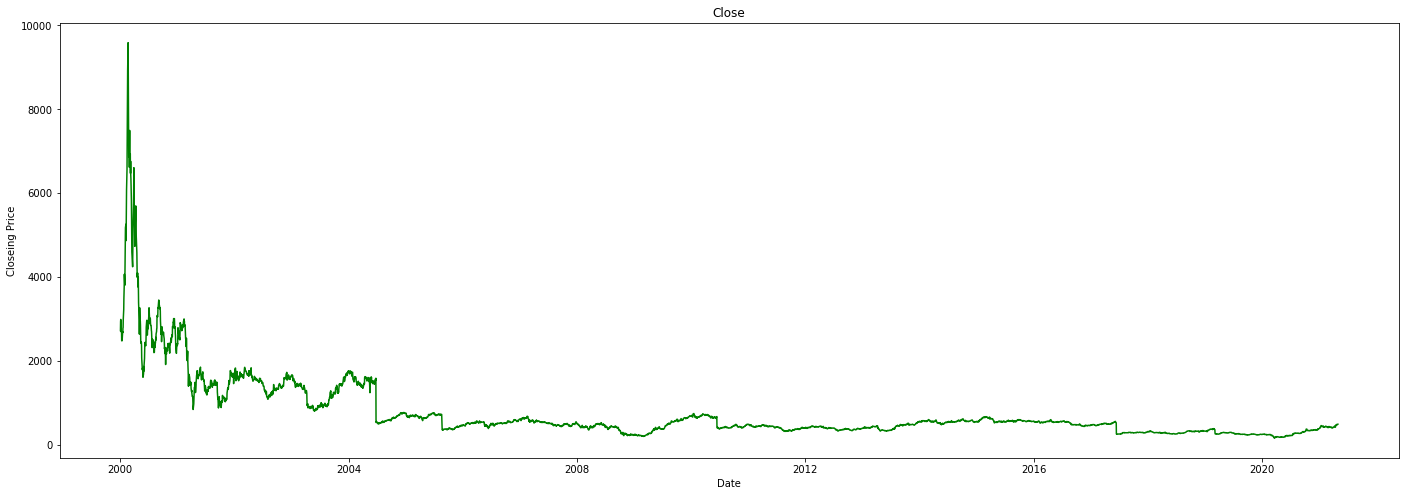

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(24, 8))
plt.title('Close')
plt.xlabel('Date')
plt.ylabel('Closeing Price')
plt.plot(df, color = 'green')

plt.show()

In [8]:
train_len = int(len(df) * 0.5)
training_data = df[:train_len]
testing_data = df[train_len:]
print(training_data)
print(testing_data)

              Close
Date               
2000-01-03  2724.20
2000-01-04  2942.15
2000-01-05  2990.10
2000-01-06  2932.25
2000-01-07  2697.70
...             ...
2010-08-11   418.95
2010-08-12   411.65
2010-08-13   415.00
2010-08-16   414.15
2010-08-17   411.85

[2653 rows x 1 columns]
             Close
Date              
2010-08-18  420.60
2010-08-19  419.55
2010-08-20  411.70
2010-08-23  412.95
2010-08-24  408.10
...            ...
2021-04-26  480.30
2021-04-27  485.05
2021-04-28  489.30
2021-04-29  489.85
2021-04-30  492.75

[2653 rows x 1 columns]


In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=30973.396, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=30717.383, Time=0.60 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=30778.280, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=30971.688, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=30685.655, Time=0.37 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=30678.116, Time=0.51 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=30646.628, Time=0.77 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=30648.539, Time=0.92 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=30648.369, Time=1.94 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=30662.624, Time=4.24 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=30650.228, Time=8.22 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=30644.785, Time=0.66 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=30676.240, Time=0.51 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=30646.698, Time=0.83 sec
 ARIMA(4,1,1)(0,0,0

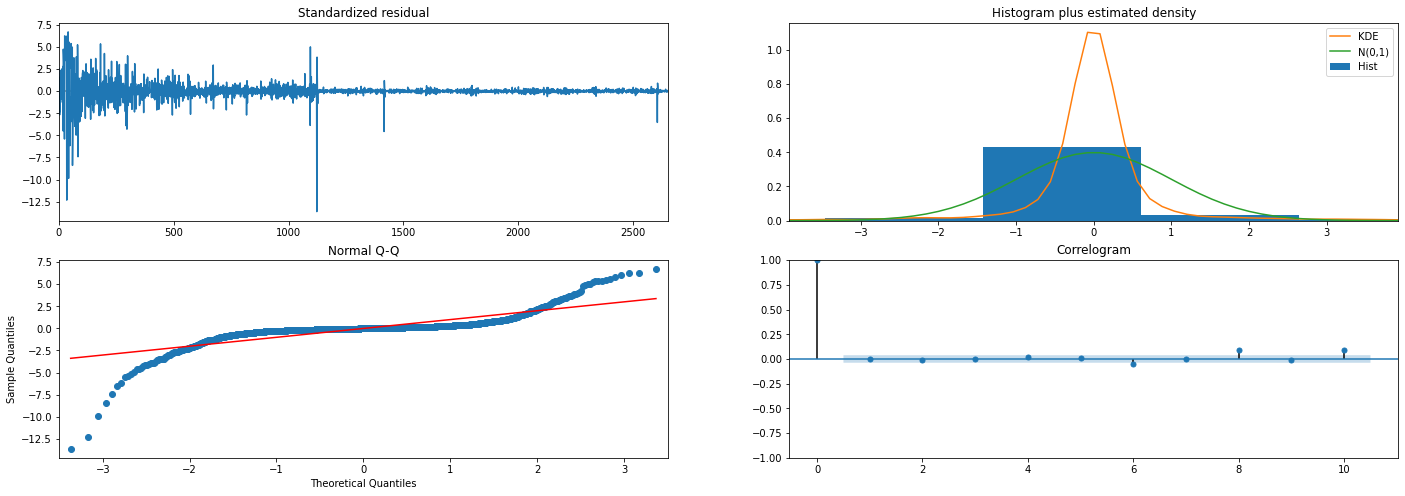

In [10]:
from pmdarima.arima import auto_arima

model_autoARIMA = auto_arima(training_data, start_p = 0, d = None, start_q = 0, 
                          max_p = 5, max_d = 5, max_q = 5, start_P = 0, 
                          D = 0, start_Q = 0, max_P = 5, max_D = 5,
                          max_Q = 5, test = 'kpss', seasonal_test = 'ocsb', 
                          error_action = 'warn', trace = True, supress_warnings = True,stepwise = True,
                          random_state = None, n_fits = 50)

print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize = (24, 8))
plt.show()

In [11]:
model = SARIMAX(training_data['Close'], 
                order = (4, 1, 0))
  
result = model.fit()
result.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2653
Model:               SARIMAX(4, 1, 0)   Log Likelihood              -15317.393
Date:                Fri, 22 Apr 2022   AIC                          30644.785
Time:                        13:22:59   BIC                          30674.200
Sample:                             0   HQIC                         30655.432
                               - 2653                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2710      0.005     50.974      0.000       0.261       0.281
ar.L2          0.1434      0.006     23.357      0.000       0.131       0.155
ar.L3         -0.0290      0.006     -4.538      0.000      -0.042      -0.016
ar.L4         -0.1122      0.007    -17.239      0.000      -0.125      -0.099
sigma2      6059.5179     39.636    152.880      0.000    5981.833    6137.203
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            153752.40
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.02   Skew:                            -1.92
Prob(H) (two-sided):                  0.00   Kurtosis:                        40.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
predictions = result.get_forecast(len(testing_data))
predictions = predictions.summary_frame()
predictions.index = testing_data.index

residual = testing_data['Close'] - predictions['mean']
residual = pd.DataFrame(residual, columns = ['resid'])
residual.describe()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


,resid
count,2653.000000
mean,0.247480
std,115.195170
min,-249.109404
25%,-103.459404
50%,2.990596
75%,104.040596
max,260.990596


Number of values with autocorrelation above 0.9 is :  46


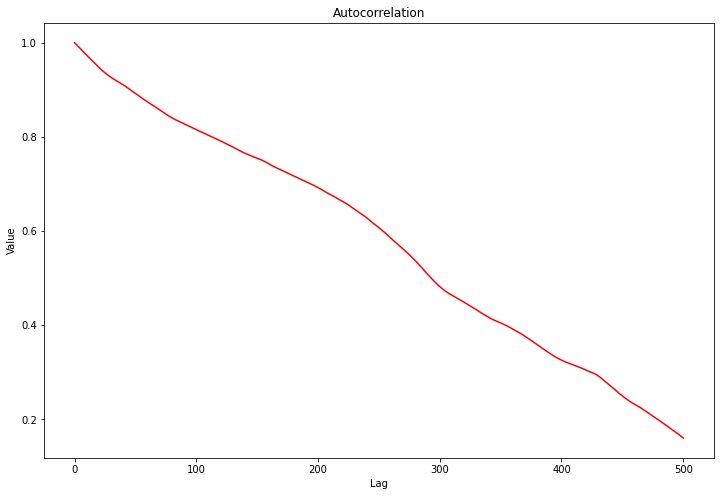

In [13]:
from statsmodels.tsa import stattools

def find_input_dim(data):
    acf_djia, confint_djia, qstat_djia, pvalues_djia = stattools.acf(data,
                                                                 adjusted=True,
                                                                 nlags=500,
                                                                 qstat=True,
                                                                 fft=True,
                                                                 alpha = 0.05)

    plt.figure(figsize=(12, 8))
    plt.plot(pd.Series(acf_djia), color = 'r')
    plt.title('Autocorrelation')
    plt.xlabel('Lag')
    plt.ylabel('Value')
    
    input_dim = sum([1 for x in acf_djia if x > 0.9])
    print("Number of values with autocorrelation above 0.9 is : ", input_dim)
    return input_dim

input_dim_hybrid = find_input_dim(residual['resid'])

In [14]:
def create_regressor_attributes(df, attribute, list_of_prev_t_instants) :
    list_of_prev_t_instants.sort()
    start = list_of_prev_t_instants[-1] 
    end = len(df)
    df['datetime'] = df.index
    df.reset_index(drop = True)

    df_copy = df[start : end]
    df_copy.reset_index(inplace = True, drop = True)

    for attribute in attribute :
            foobar = pd.DataFrame()
            for prev_t in list_of_prev_t_instants :
                new_col = pd.DataFrame(df[attribute].iloc[(start - prev_t) : (end - prev_t)])
                new_col.reset_index(drop = True, inplace = True)
                new_col.rename(columns={attribute : '{}_(t-{})'.format(attribute, prev_t)}, inplace=True)
                foobar = pd.concat([foobar, new_col], sort = False, axis = 1)
            df_copy = pd.concat([df_copy, foobar], sort = False, axis = 1)
            
    df_copy.set_index(['datetime'], drop = True, inplace = True)
    return df_copy

column_hybrid = ['resid']

n_lags_hybrid = []
for i in range(1, input_dim_hybrid + 1):
    n_lags_hybrid.append(i)

df_new_hybrid = create_regressor_attributes(residual, column_hybrid, n_lags_hybrid)
df_new_hybrid

,resid,resid_(t-1),resid_(t-2),resid_(t-3),resid_(t-4),resid_(t-5),resid_(t-6),resid_(t-7),resid_(t-8),resid_(t-9),...,resid_(t-37),resid_(t-38),resid_(t-39),resid_(t-40),resid_(t-41),resid_(t-42),resid_(t-43),resid_(t-44),resid_(t-45),resid_(t-46)
datetime,,,,,,,,,,,,,,,,,,,,,
2010-10-22,37.440596,58.690596,52.540596,53.040596,56.390596,61.990596,78.990596,71.940596,51.990596,52.190596,...,-11.222104,-13.485703,-14.538016,-11.679767,-11.891041,-3.224935,1.685064,0.587888,8.410384,8.773082
2010-10-25,18.890596,37.440596,58.690596,52.540596,53.040596,56.390596,61.990596,78.990596,71.940596,51.990596,...,-7.913501,-11.222104,-13.485703,-14.538016,-11.679767,-11.891041,-3.224935,1.685064,0.587888,8.410384
2010-10-26,18.940596,18.890596,37.440596,58.690596,52.540596,53.040596,56.390596,61.990596,78.990596,71.940596,...,-8.008361,-7.913501,-11.222104,-13.485703,-14.538016,-11.679767,-11.891041,-3.224935,1.685064,0.587888
2010-10-27,19.290596,18.940596,18.890596,37.440596,58.690596,52.540596,53.040596,56.390596,61.990596,78.990596,...,-10.156389,-8.008361,-7.913501,-11.222104,-13.485703,-14.538016,-11.679767,-11.891041,-3.224935,1.685064
2010-10-28,15.590596,19.290596,18.940596,18.890596,37.440596,58.690596,52.540596,53.040596,56.390596,61.990596,...,-6.206893,-10.156389,-8.008361,-7.913501,-11.222104,-13.485703,-14.538016,-11.679767,-11.891041,-3.224935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,68.840596,64.240596,75.190596,58.640596,61.290596,57.740596,19.240596,7.490596,21.140596,38.640596,...,9.840596,11.640596,4.040596,7.240596,18.490596,21.490596,18.740596,26.090596,28.240596,30.540596
2021-04-27,73.590596,68.840596,64.240596,75.190596,58.640596,61.290596,57.740596,19.240596,7.490596,21.140596,...,-1.159404,9.840596,11.640596,4.040596,7.240596,18.490596,21.490596,18.740596,26.090596,28.240596
2021-04-28,77.840596,73.590596,68.840596,64.240596,75.190596,58.640596,61.290596,57.740596,19.240596,7.490596,...,2.940596,-1.159404,9.840596,11.640596,4.040596,7.240596,18.490596,21.490596,18.740596,26.090596


In [15]:
def create_train_valid_test(data, test_set_size, valid_set_size):
    df_copy = data.reset_index(drop = True)
    
    df_test = df_copy.iloc[int((len(df_copy) * (1 - test_set_size))) : ]
    df_train_plus_valid = df_copy.iloc[ : int((len(df_copy) * (1 - test_set_size)))]
    
    df_train = df_train_plus_valid.iloc[ : int((len(df_train_plus_valid) * (1 - valid_set_size))) ]
    df_valid = df_train_plus_valid.iloc[int((len(df_train_plus_valid) * (1 - valid_set_size))) : ]
    
    X_train, y_train = df_train.iloc[:, 1:], df_train.iloc[:, 0]
    X_valid, y_valid = df_valid.iloc[:, 1:], df_valid.iloc[:, 0]
    X_test, y_test = df_test.iloc[:, 1:], df_test.iloc[:, 0]
    
    print('Shape of training inputs, training target:', X_train.shape, y_train.shape)
    print('Shape of validation inputs, validation target:', X_valid.shape, y_valid.shape)
    print('Shape of test inputs, test target:', X_test.shape, y_test.shape)
    
    return X_train, y_train, X_valid, y_valid, X_test, y_test

X_train_hybrid, y_train_hybrid, X_valid_hybrid, y_valid_hybrid, X_test_hybrid, y_test_hybrid = create_train_valid_test(df_new_hybrid, 0.20, 0.10)

Shape of training inputs, training target: (1876, 46) (1876,)
Shape of validation inputs, validation target: (209, 46) (209,)
Shape of test inputs, test target: (522, 46) (522,)


In [16]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def scale_data(X_train, y_train, X_valid, y_valid, X_test, y_test, scaler):
    X_train_scaled = scaler.fit_transform(np.array(X_train))
    X_valid_scaled = scaler.fit_transform(np.array(X_valid))
    X_test_scaled = scaler.fit_transform(np.array(X_test))
    
    y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
    y_valid_scaled = scaler.fit_transform(np.array(y_valid).reshape(-1, 1))
    y_test_scaled = scaler.fit_transform(np.array(y_test).reshape(-1, 1))
    
    return X_train_scaled, y_train_scaled, X_valid_scaled, y_valid_scaled, X_test_scaled, y_test_scaled

scaler = MinMaxScaler()

X_train_hybrid, y_train_hybrid, X_valid_hybrid, y_valid_hybrid, X_test_hybrid, y_test_hybrid = scale_data(X_train_hybrid, y_train_hybrid, X_valid_hybrid, y_valid_hybrid, X_test_hybrid, y_test_hybrid, scaler)

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

def forecast_HMLP_residuals(input_dim_hybrid, X_train, y_train, X_valid, y_valid, X_test):
    model = Sequential()
    model.add(Dense(input_dim_hybrid, activation = 'tanh', input_dim = input_dim_hybrid))
    model.add(Dense(input_dim_hybrid / 2, activation = 'tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='linear'))
    model.compile(
            optimizer=Adam(learning_rate = 0.01),
            loss = "mean_squared_error",
            metrics=["mse", "mae"])
    
    model.summary()
    
    history_hybrid = model.fit(X_train, y_train,
                               validation_data = (X_valid, y_valid),
                               batch_size = 32,
                               epochs = 100, verbose = 1)
    
    pred_HMLP = model.predict(X_test)
    
    return pred_HMLP, history_hybrid

resid_HMLP, history_hybrid = forecast_HMLP_residuals(input_dim_hybrid, X_train_hybrid, y_train_hybrid, X_valid_hybrid, y_valid_hybrid, X_test_hybrid)
resid_HMLP = scaler.inverse_transform(resid_HMLP)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 46)                2162      
                                                                 
 dense_1 (Dense)             (None, 23)                1081      
                                                                 
 dropout (Dropout)           (None, 23)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 24        
                                                                 
Total params: 3,267
Trainable params: 3,267
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
59/59 [==============================] - 1s 6ms/step - loss: 0.2037 - mse: 0.2037 - mae: 0.3214 - val_loss: 0.0303 - val_mse: 0.0303 - val_mae: 0.1342
Epoch 2/100
59/59 [====

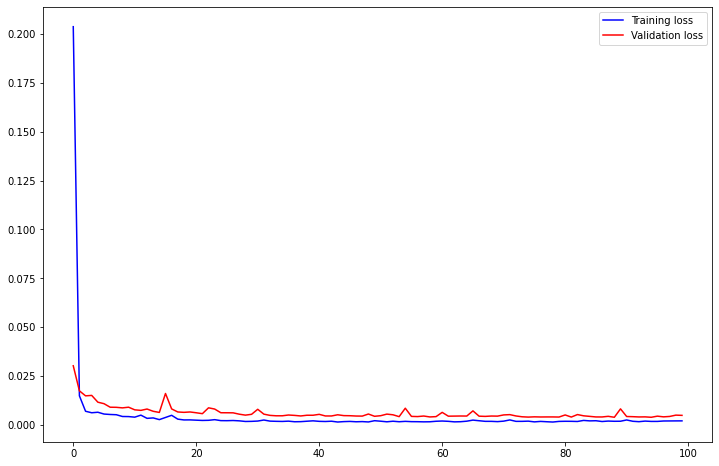

In [18]:
def plot_loss(history):
    plt.figure(figsize = (12, 8))
    history_dict=history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    plt.plot(loss_values,'b', label = 'Training loss')
    plt.plot(val_loss_values,'r',label = 'Validation loss')
    plt.legend()

plot_loss(history_hybrid)

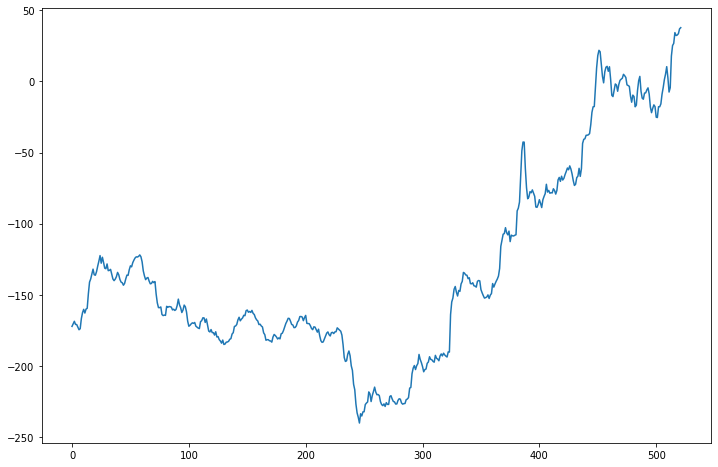

In [19]:
plt.figure(figsize = (12, 8))
plt.plot(resid_HMLP)
plt.show()

In [20]:
pred_hybrid = [a + b for a,b in zip(predictions['mean'], resid_HMLP)]

def equal_size(list1, list2):
    if len(list1) > len(list2):
        s = len(list1)-len(list2)
        list1 = list1[:-s]
        return list1, list2
    if len(list2) > len(list1):
        s = len(list2)-len(list1)
        list2 = list2[:-s]
        return list1, list2
    else:
        return list1, list2

y_test_rescaled, pred_hybrid  = equal_size(scaler.inverse_transform(y_test_hybrid), pred_hybrid)

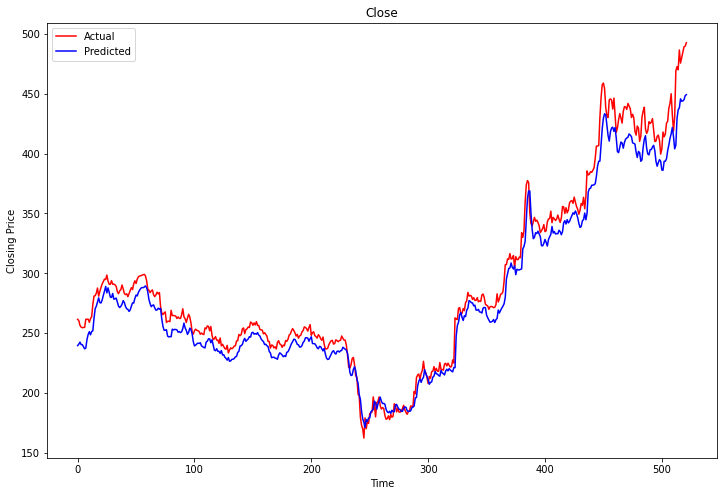

In [21]:
def plot_comparison_graph(actual, prediction):
    y_actual = pd.DataFrame(actual, columns = ['Actual'])
    y_hat = pd.DataFrame(prediction, columns = ['Predicted'])
    
    plt.figure(figsize=(12, 8))
    plt.plot(y_actual, color='r')
    plt.plot(y_hat, color='b')
    
    plt.legend(['Actual', 'Predicted'], loc='best')
    plt.title('Close')
    plt.ylabel('Closing Price')
    plt.xlabel('Time')

    plt.show()
plot_comparison_graph(df[-len(y_test_hybrid):].to_numpy(), pred_hybrid)

In [22]:
from sklearn.metrics import mean_squared_error
import math

MSE = mean_squared_error(df[-len(y_test_hybrid):].to_numpy(), pred_hybrid)
print('Mean Squared Error: ', MSE)    
RMSE = math.sqrt(mean_squared_error(df[-len(y_test_hybrid):].to_numpy(), pred_hybrid))
print('Root Mean Squared Error: ', RMSE)
MAPE = np.mean(np.abs(np.vstack(pred_hybrid) - df[-len(y_test_hybrid):].to_numpy())/np.abs(df[-len(y_test_hybrid):].to_numpy()))
print('MAPE : ', MAPE)

Mean Squared Error:  207.1175123852803
Root Mean Squared Error:  14.39157782820495
MAPE :  0.03837429484460417
